[Home](../README.md)

### Model Training - Linear Regression

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. We will now Train a Linear regression algorithm on the features you have engineered to see how closely we can predict the health outcomes for individuals.


Load the required dependencies:

In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle
data_frame = pd.read_csv("training_data.csv")

#### Multiple Variable Linear Regression


In [2]:
# Create a data frame from the csv file
training_data = pd.read_csv('training_data.csv')

x_name = ['budget','score','release_quarter','votes', 'rating', 'year', 'is_sequel', 'country', 'runtime']
y_name = 'gross'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

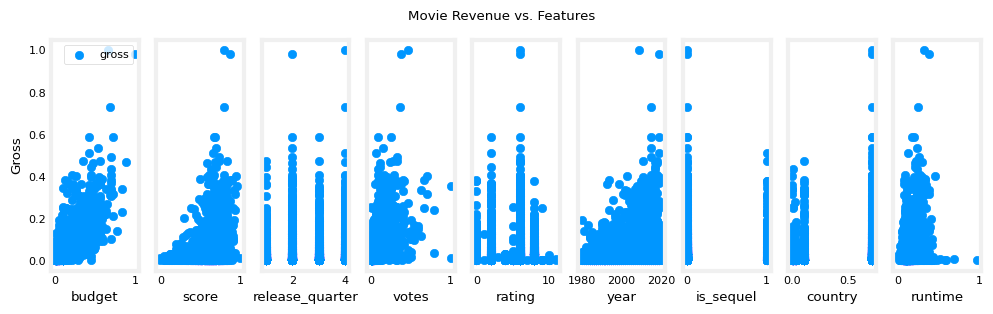

In [3]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'gross')
    ax[i].set_xlabel(x_name[i])
ax[0].set_ylabel("Gross"); ax[0].legend();
fig.suptitle("Movie Revenue vs. Features")
plt.show()

In [4]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

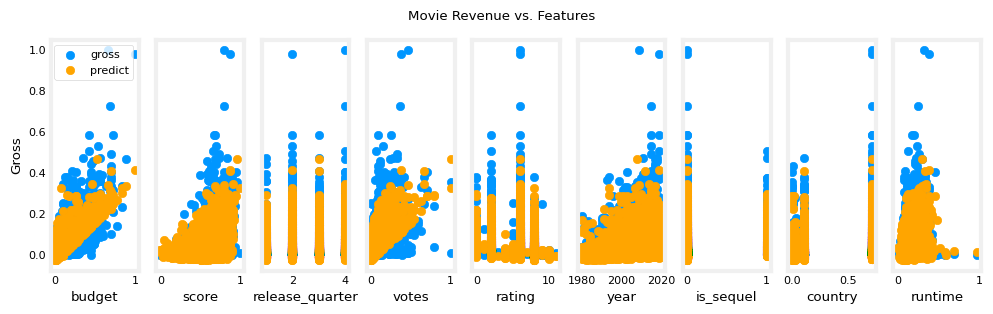

In [5]:
# scatter plot predictions and targets vs original features    
y_pred = my_model.predict(x)
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'gross')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Gross"); ax[0].legend();
fig.suptitle("Movie Revenue vs. Features")
plt.show()

In [6]:
# save the model to disk
filename = 'my_saved_model_v2.sav'
pickle.dump(my_model, open('../Model_Testing_and_Validation/' + filename, 'wb'))